Collected data for 18 languages.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


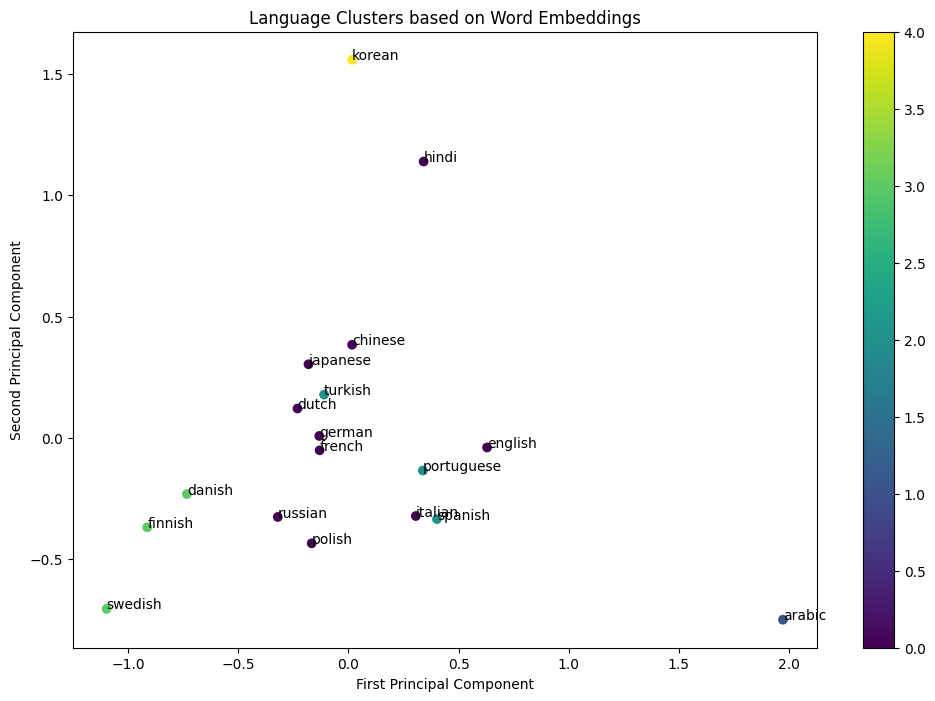

Analysis complete. The plot shows language clusters based on semantic similarities.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import gensim.downloader as api

# Download pre-trained word vectors
word_vectors = api.load("glove-wiki-gigaword-100")

# List of languages (you can expand this)
languages = ['english', 'spanish', 'french', 'german', 'italian', 'portuguese',
             'dutch', 'russian', 'chinese', 'japanese', 'korean', 'arabic',
             'hindi', 'turkish', 'swedish', 'polish', 'danish', 'finnish']

# Function to get language vector
def get_language_vector(language):
    words = [w for w in word_vectors.index_to_key if w.startswith(language)]
    if not words:
        return None
    return np.mean([word_vectors[w] for w in words], axis=0)

# Create language vectors
language_vectors = []
valid_languages = []

for lang in languages:
    vec = get_language_vector(lang)
    if vec is not None:
        language_vectors.append(vec)
        valid_languages.append(lang)

# Convert to numpy array
language_vectors = np.array(language_vectors)

print(f"Collected data for {len(valid_languages)} languages.")

# Perform PCA
pca = PCA(n_components=2)
language_vectors_2d = pca.fit_transform(language_vectors)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(language_vectors)

# Visualize the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(language_vectors_2d[:, 0], language_vectors_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Language Clusters based on Word Embeddings')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add language labels to the plot
for i, lang in enumerate(valid_languages):
    plt.annotate(lang, (language_vectors_2d[i, 0], language_vectors_2d[i, 1]))

plt.colorbar(scatter)
plt.show()

print("Analysis complete. The plot shows language clusters based on semantic similarities.")